<a href="https://colab.research.google.com/github/haryanealayaar/sunil/blob/main/Implementation_of_PCA_with_ANN_algorithm_for_Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/my drive/database/dataset/faces/'

In [ ]:
dir_name= '/content/drive/MyDrive/database/dataset/faces/'
y=[];X=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    # print(person_name)
    dir_path = dir_name+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        # formulate the image path
        image_path = dir_path+image_name
        # Read the input image
        img = cv2.imread(image_path)
        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # resize image to 300*300 dimension
        resized_image= cv2.resize(gray,(h,w))
        # convert matrix to vector
        v = resized_image.flatten()
        X.append(v)
        # increase the number of samples
        n_samples =n_samples+1
        # Addinng th categorical label
        y.append(person_id)
        # adding the person name
        target_names.append(person_name)
    # Increase the person id by 1
    person_id=person_id+1
# #############################################################################
# transform list to numpy array
y=np.array(y)
X=np.array(X)
target_names =np.array(target_names)
n_features = X.shape[1]
print(y.shape,X.shape,target_names.shape)
print("Number of sampels:",n_samples)
# Download the data, if not already on disk and load it as numpy arrays

# lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# # introspect the images arrays to find the shapes (for plotting)
# n_samples, h, w = lfw_people.images.shape
# print(n_samples, h, w)
# # for machine learning we use the 2 data directly (as relative pixel
# # positions info is ignored by this model)
# X = lfw_people.data
# n_features = X.shape[1]

# print(X.shape)
# # the label to predict is the id of the person
# y = lfw_people.target
# print(y)
# if 0 in y:
#     print("yes")
# target_names = lfw_people.target_names
# print(target_names)
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

(450,) (450, 90000) (450,)
Number of sampels: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


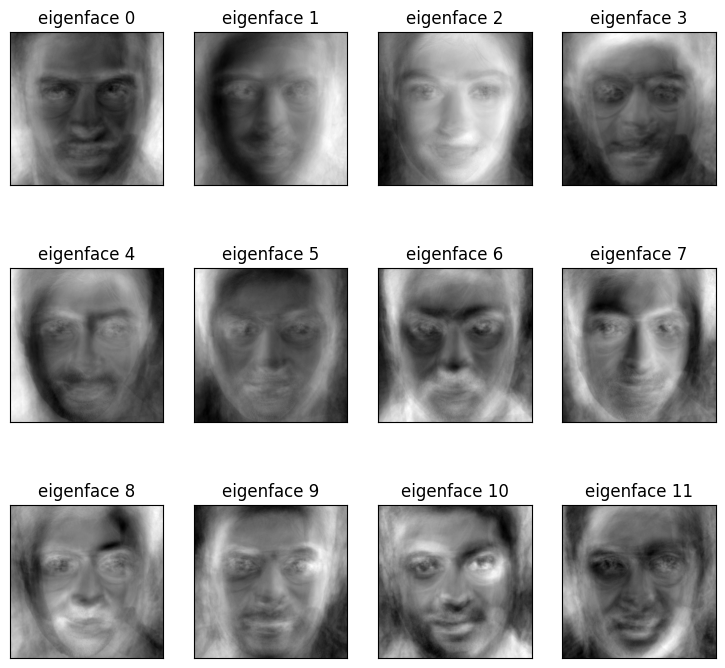

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [ ]:
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"% (n_components, X_train.shape[0]))

# Applying PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# Generating eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

# %%Compute Fisherfaces
lda = LinearDiscriminantAnalysis()
#Compute LDA of reduced data
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project done...")

In [ ]:
# Training with Multi layer perceptron
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10),max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.67943177
Iteration 2, loss = 2.63176145
Iteration 3, loss = 2.58471764
Iteration 4, loss = 2.54209692
Iteration 5, loss = 2.49928383
Iteration 6, loss = 2.45715772
Iteration 7, loss = 2.41736756
Iteration 8, loss = 2.37968282
Iteration 9, loss = 2.34232666
Iteration 10, loss = 2.30777663
Iteration 11, loss = 2.27321916
Iteration 12, loss = 2.24043423
Iteration 13, loss = 2.20948876
Iteration 14, loss = 2.17918930
Iteration 15, loss = 2.14881514
Iteration 16, loss = 2.12074827
Iteration 17, loss = 2.09285391
Iteration 18, loss = 2.06570446
Iteration 19, loss = 2.03922004
Iteration 20, loss = 2.01206243
Iteration 21, loss = 1.98717099
Iteration 22, loss = 1.96236506
Iteration 23, loss = 1.93699291
Iteration 24, loss = 1.91303916
Iteration 25, loss = 1.88908880
Iteration 26, loss = 1.86612270
Iteration 27, loss = 1.84293854
Iteration 28, loss = 1.81980033
Iteration 29, loss = 1.79772244
Iteration 30, loss = 1.77525938
Iteration 31, loss = 1.75349265
Iteration 32, los

Accuracy: 65.48672566371681


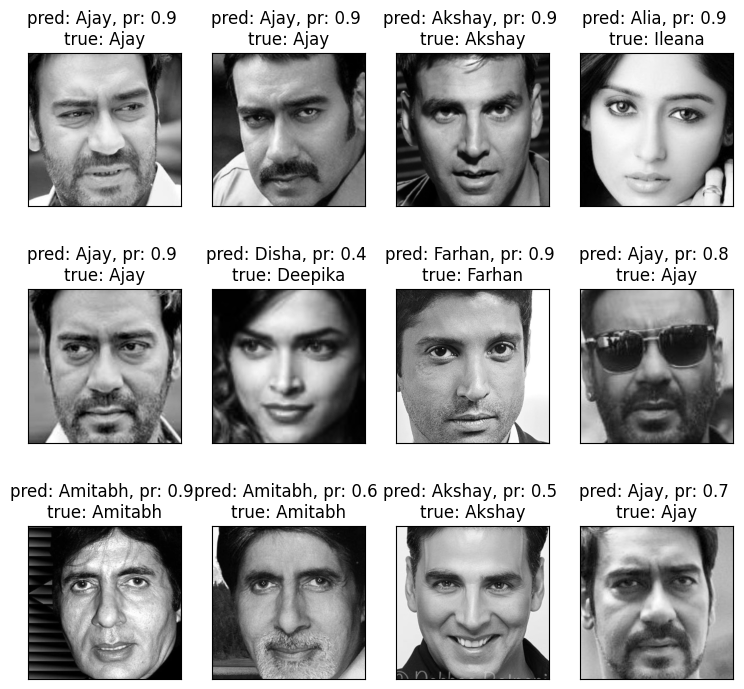

In [ ]:
y_pred=[];y_prob=[]
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    # print(prob,np.max(prob))
    class_id = np.where(prob == np.max(prob))[0][0]
    # print(class_index)
    # Find the label of the mathed face
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

# Transform the data
y_pred = np.array(y_pred)


prediction_titles=[]
true_positive = 0
for i in range(y_pred.shape[0]):
    # print(y_test[i],y_pred[i])
    # true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    # pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    # result = 'prediction: %s \ntrue:      %s' % (pred_name, true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive =true_positive+1

print("Accuracy:",true_positive*100/y_pred.shape[0])

# # Plot results
plot_gallery(X_test, prediction_titles, h, w)
plt.show()

# Face Recognition Project

This project demonstrates a face recognition system using Python and several popular machine learning libraries.

## How it Works

The system follows these steps:

1.  **Loads Face Images:** It loads face images from a specified directory on your Google Drive.
2.  **Preprocesses Images:** Each image is converted to grayscale and resized to a standard size (300x300 pixels). The image data is then flattened into a vector.
3.  **Applies PCA (Principal Component Analysis):** This technique reduces the dimensionality of the image data while retaining the most important features (often called "eigenfaces").
4.  **Applies LDA (Linear Discriminant Analysis):** This method further transforms the data to maximize the separation between different classes (individuals).
5.  **Trains an MLP Classifier:** A Multi-Layer Perceptron (a type of neural network) is trained on the processed image data to learn to classify faces.
6.  **Evaluates the Model:** The trained model is used to predict the identity of faces in a test set, and the accuracy of the predictions is calculated.
7.  **Visualizes Results:** The project displays some of the test images along with their predicted and true identities and the confidence of the prediction.

## Requirements

*   Python
*   Libraries: `matplotlib`, `sklearn`, `numpy`, `opencv-python`
*   Google Colab (or a similar environment with Google Drive access)
*   A dataset of face images organized in folders, where each folder represents a different person.

## Setup

1.  **Mount Google Drive:** Run the provided code cell to mount your Google Drive.
2.  **Specify Dataset Path:** Update the `path` and `dir_name` variables in the code to point to the location of your face image dataset on Google Drive.
3.  **Run the Notebook:** Execute the code cells in order.

## Code Overview

*   `plot_gallery`: A helper function to display images in a grid.
*   Data Loading and Preprocessing: Code to load images from your specified directory, resize them, and prepare them for the models.
*   Data Splitting: Splits the data into training and testing sets.
*   PCA and LDA: Applies dimensionality reduction techniques.
*   MLP Classifier: Trains the face recognition model.
*   Prediction and Evaluation: Makes predictions on the test set and calculates accuracy.
*   Result Visualization: Displays test images with predictions.

## Output

The notebook will output:

*   The shapes of the processed data arrays.
*   The number of samples, features, and classes.
*   A gallery of the top "eigenfaces".
*   The loss during the MLP training process.
*   The accuracy of the face recognition model on the test set.
*   A gallery of test images with prediction results and probabilities.